# RSCU - Relative Synonymous Codon Usage

Generisanje tabele kodona i inverzne tabele kodona

In [1]:
bases = ['T','C','A','G']
codons = [a + b + c for a in bases for b in bases for c in bases]
amino_acids = 'FFLLSSSSYY**CC*WLLLLPPPPHHQQRRRRIIIMTTTTNNKKSSRRVVVVAAAADDEEGGGG'
codon_table = dict(zip(codons, amino_acids))

In [2]:
print(codon_table)

{'TTT': 'F', 'TTC': 'F', 'TTA': 'L', 'TTG': 'L', 'TCT': 'S', 'TCC': 'S', 'TCA': 'S', 'TCG': 'S', 'TAT': 'Y', 'TAC': 'Y', 'TAA': '*', 'TAG': '*', 'TGT': 'C', 'TGC': 'C', 'TGA': '*', 'TGG': 'W', 'CTT': 'L', 'CTC': 'L', 'CTA': 'L', 'CTG': 'L', 'CCT': 'P', 'CCC': 'P', 'CCA': 'P', 'CCG': 'P', 'CAT': 'H', 'CAC': 'H', 'CAA': 'Q', 'CAG': 'Q', 'CGT': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R', 'ATT': 'I', 'ATC': 'I', 'ATA': 'I', 'ATG': 'M', 'ACT': 'T', 'ACC': 'T', 'ACA': 'T', 'ACG': 'T', 'AAT': 'N', 'AAC': 'N', 'AAA': 'K', 'AAG': 'K', 'AGT': 'S', 'AGC': 'S', 'AGA': 'R', 'AGG': 'R', 'GTT': 'V', 'GTC': 'V', 'GTA': 'V', 'GTG': 'V', 'GCT': 'A', 'GCC': 'A', 'GCA': 'A', 'GCG': 'A', 'GAT': 'D', 'GAC': 'D', 'GAA': 'E', 'GAG': 'E', 'GGT': 'G', 'GGC': 'G', 'GGA': 'G', 'GGG': 'G'}


In [3]:
'''Inverzna tabela kodona'''

reverse_codon_table = {
    'AA': ['COD', 'COD']
}

reverse_codon_table = {}
for codon, aa in codon_table.items():
    if aa not in reverse_codon_table:
        reverse_codon_table[aa] = [codon]
    else:
        reverse_codon_table[aa].append(codon)

In [4]:
print(reverse_codon_table)

{'F': ['TTT', 'TTC'], 'L': ['TTA', 'TTG', 'CTT', 'CTC', 'CTA', 'CTG'], 'S': ['TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC'], 'Y': ['TAT', 'TAC'], '*': ['TAA', 'TAG', 'TGA'], 'C': ['TGT', 'TGC'], 'W': ['TGG'], 'P': ['CCT', 'CCC', 'CCA', 'CCG'], 'H': ['CAT', 'CAC'], 'Q': ['CAA', 'CAG'], 'R': ['CGT', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'], 'I': ['ATT', 'ATC', 'ATA'], 'M': ['ATG'], 'T': ['ACT', 'ACC', 'ACA', 'ACG'], 'N': ['AAT', 'AAC'], 'K': ['AAA', 'AAG'], 'V': ['GTT', 'GTC', 'GTA', 'GTG'], 'A': ['GCT', 'GCC', 'GCA', 'GCG'], 'D': ['GAT', 'GAC'], 'E': ['GAA', 'GAG'], 'G': ['GGT', 'GGC', 'GGA', 'GGG']}


Implementacija algoritma za izračunavanje RSCU prema jednakosti:
    $$RSCU_{ij} = \frac{n_i \cdot x_{ij}}{\sum_{k = 0}^{n_i}x_{ik}}$$

Gde je:
* $RSCU_{ij}$ - Vrednost RSCU za kodon $j$ aminokiseline $i$
* $n_{i}$ - Broj kodona koji kodiraju aminokiselinu $i$
* $x_{ij}$ - $j$-ti kodon aminokiseline $i$

Ukoliko ni jedan primerak kodona jedne aminokiseline nije pronađen, podrazumevana vrednost broja pojavljivanja takvih kodona je $0.5$

In [5]:
def my_RSCU(sequence):
    # Inicijalizacija
    codon_counts = {}
    for codon in codon_table.keys():
        codon_counts[codon] = 0.5
       
    # Prebrojavanje kodona
    m = len(sequence)
    for i in range(0,m - 2,3):
        found_codon = sequence[i:i + 3]
        if codon_counts[found_codon] < 1:
            codon_counts[found_codon] = 1
        else:
            codon_counts[found_codon] += 1
        
    # Izračunavanje RSCU
    rscu_table = {}
    for aa, aa_codons in reverse_codon_table.items():
        ni = len(aa_codons)
        
        x_sum = 0 # sum(x_ij)
        for aa_codon in aa_codons:
            x_sum += codon_counts[aa_codon]
            
        for aa_codon in aa_codons:
            xij = codon_counts[aa_codon]
            rscu_table[aa_codon] = (ni * xij) / x_sum
            
    return rscu_table
        

In [6]:
sequence = 'CGCATTACATTACGTACTGGTACA'
my_RSCU(sequence)

{'TTT': 1.0,
 'TTC': 1.0,
 'TTA': 1.7142857142857142,
 'TTG': 0.8571428571428571,
 'CTT': 0.8571428571428571,
 'CTC': 0.8571428571428571,
 'CTA': 0.8571428571428571,
 'CTG': 0.8571428571428571,
 'TCT': 1.0,
 'TCC': 1.0,
 'TCA': 1.0,
 'TCG': 1.0,
 'AGT': 1.0,
 'AGC': 1.0,
 'TAT': 1.0,
 'TAC': 1.0,
 'TAA': 1.0,
 'TAG': 1.0,
 'TGA': 1.0,
 'TGT': 1.0,
 'TGC': 1.0,
 'TGG': 1.0,
 'CCT': 1.0,
 'CCC': 1.0,
 'CCA': 1.0,
 'CCG': 1.0,
 'CAT': 1.0,
 'CAC': 1.0,
 'CAA': 1.0,
 'CAG': 1.0,
 'CGT': 1.5,
 'CGC': 1.5,
 'CGA': 0.75,
 'CGG': 0.75,
 'AGA': 0.75,
 'AGG': 0.75,
 'ATT': 1.5,
 'ATC': 0.75,
 'ATA': 0.75,
 'ATG': 1.0,
 'ACT': 1.0,
 'ACC': 0.5,
 'ACA': 2.0,
 'ACG': 0.5,
 'AAT': 1.0,
 'AAC': 1.0,
 'AAA': 1.0,
 'AAG': 1.0,
 'GTT': 1.0,
 'GTC': 1.0,
 'GTA': 1.0,
 'GTG': 1.0,
 'GCT': 1.0,
 'GCC': 1.0,
 'GCA': 1.0,
 'GCG': 1.0,
 'GAT': 1.0,
 'GAC': 1.0,
 'GAA': 1.0,
 'GAG': 1.0,
 'GGT': 1.6,
 'GGC': 0.8,
 'GGA': 0.8,
 'GGG': 0.8}

## Biblioteka CAI
CAI - Codon Adaptation Index, definiše adaptiranost korišćenih kodona u odnosu na kodone gena sa najvećom ekspresijom kod istog organizma. Što je vrednost bliža jedinici, to je gen adaptiraniji i očekivano je da je njegova ekspresija veća. Relativna adaptiranost kodona predstavlja RSCU vrednost kodona u odnosu na najveću vrednost RSCU sinonimnog kodona.

In [7]:
from CAI import RSCU, relative_adaptiveness, CAI

In [8]:
RSCU([sequence]) # RSCU iz CAI biblioteke očekuje listu sekvenci kao argument

{'TTT': 1.0,
 'TTC': 1.0,
 'TTA': 1.7142857142857144,
 'TTG': 0.8571428571428572,
 'TCT': 1.0,
 'TCC': 1.0,
 'TCA': 1.0,
 'TCG': 1.0,
 'TAT': 1.0,
 'TAC': 1.0,
 'TGT': 1.0,
 'TGC': 1.0,
 'TGG': 1.0,
 'CTT': 0.8571428571428572,
 'CTC': 0.8571428571428572,
 'CTA': 0.8571428571428572,
 'CTG': 0.8571428571428572,
 'CCT': 1.0,
 'CCC': 1.0,
 'CCA': 1.0,
 'CCG': 1.0,
 'CAT': 1.0,
 'CAC': 1.0,
 'CAA': 1.0,
 'CAG': 1.0,
 'CGT': 1.5,
 'CGC': 1.5,
 'CGA': 0.75,
 'CGG': 0.75,
 'ATT': 1.5,
 'ATC': 0.75,
 'ATA': 0.75,
 'ATG': 1.0,
 'ACT': 1.0,
 'ACC': 0.5,
 'ACA': 2.0,
 'ACG': 0.5,
 'AAT': 1.0,
 'AAC': 1.0,
 'AAA': 1.0,
 'AAG': 1.0,
 'AGT': 1.0,
 'AGC': 1.0,
 'AGA': 0.75,
 'AGG': 0.75,
 'GTT': 1.0,
 'GTC': 1.0,
 'GTA': 1.0,
 'GTG': 1.0,
 'GCT': 1.0,
 'GCC': 1.0,
 'GCA': 1.0,
 'GCG': 1.0,
 'GAT': 1.0,
 'GAC': 1.0,
 'GAA': 1.0,
 'GAG': 1.0,
 'GGT': 1.6,
 'GGC': 0.8,
 'GGA': 0.8,
 'GGG': 0.8}

In [9]:
relative_adaptiveness([sequence])

{'TTT': 1.0,
 'TTC': 1.0,
 'TTA': 1.0,
 'TTG': 0.5,
 'TCT': 1.0,
 'TCC': 1.0,
 'TCA': 1.0,
 'TCG': 1.0,
 'TAT': 1.0,
 'TAC': 1.0,
 'TGT': 1.0,
 'TGC': 1.0,
 'TGG': 1.0,
 'CTT': 0.5,
 'CTC': 0.5,
 'CTA': 0.5,
 'CTG': 0.5,
 'CCT': 1.0,
 'CCC': 1.0,
 'CCA': 1.0,
 'CCG': 1.0,
 'CAT': 1.0,
 'CAC': 1.0,
 'CAA': 1.0,
 'CAG': 1.0,
 'CGT': 1.0,
 'CGC': 1.0,
 'CGA': 0.5,
 'CGG': 0.5,
 'ATT': 1.0,
 'ATC': 0.5,
 'ATA': 0.5,
 'ATG': 1.0,
 'ACT': 0.5,
 'ACC': 0.25,
 'ACA': 1.0,
 'ACG': 0.25,
 'AAT': 1.0,
 'AAC': 1.0,
 'AAA': 1.0,
 'AAG': 1.0,
 'AGT': 1.0,
 'AGC': 1.0,
 'AGA': 0.5,
 'AGG': 0.5,
 'GTT': 1.0,
 'GTC': 1.0,
 'GTA': 1.0,
 'GTG': 1.0,
 'GCT': 1.0,
 'GCC': 1.0,
 'GCA': 1.0,
 'GCG': 1.0,
 'GAT': 1.0,
 'GAC': 1.0,
 'GAA': 1.0,
 'GAG': 1.0,
 'GGT': 1.0,
 'GGC': 0.5,
 'GGA': 0.5,
 'GGG': 0.5}

## Primer 1: Računanje RSCU nad kodirajućim sekvencama e. coli

In [10]:
from Bio import SeqIO

In [11]:
records_raw = SeqIO.parse('e_coli_cds.fna', 'fasta')
sequences = [str(record.seq) for record in records_raw] # - Kopiranje radi mogućnosti kasnije ponovne iteracije

In [12]:
e_coli_rscu = RSCU(sequences)

In [13]:
e_coli_rscu

{'TTT': 1.1644750083864475,
 'TTC': 0.8355249916135525,
 'TTA': 0.7874569985605192,
 'TTG': 0.7409056530119307,
 'TCT': 0.8690802493306383,
 'TCC': 0.9035589937878997,
 'TCA': 0.8085043336543448,
 'TCG': 0.8758744033949606,
 'TAT': 1.1451399894347596,
 'TAC': 0.8548600105652404,
 'TGT': 0.9024497418433484,
 'TGC': 1.0975502581566516,
 'TGG': 1.0,
 'CTT': 0.6578305316319809,
 'CTC': 0.6077658769853856,
 'CTA': 0.220643130748774,
 'CTG': 2.98539780906141,
 'CCT': 0.6569981384475518,
 'CCC': 0.5066308786816168,
 'CCA': 0.757608554482878,
 'CCG': 2.0787624283879533,
 'CAT': 1.1560968620146153,
 'CAC': 0.8439031379853847,
 'CAA': 0.6566959893924921,
 'CAG': 1.343304010607508,
 'CGT': 2.1947283122495835,
 'CGC': 2.2522621888083556,
 'CGA': 0.4055057849007338,
 'CGG': 0.6690676630801783,
 'ATT': 1.5088587441775407,
 'ATC': 1.2195376456287181,
 'ATA': 0.27160361019374135,
 'ATG': 1.0,
 'ACT': 0.6549182216079245,
 'ACC': 1.6609076249712047,
 'ACA': 0.5830453812485602,
 'ACG': 1.1011287721723104

In [14]:
'''Konstrukcija Pandas DataFrame-a'''
import pandas as pd

In [15]:
e_coli_rscu_df = pd.DataFrame(data=[e_coli_rscu.values()], columns=e_coli_rscu.keys())

In [16]:
e_coli_rscu_df

,TTT,TTC,TTA,TTG,TCT,TCC,TCA,TCG,TAT,TAC,...,GCA,GCG,GAT,GAC,GAA,GAG,GGT,GGC,GGA,GGG
0,1.164475,0.835525,0.787457,0.740906,0.86908,0.903559,0.808504,0.875874,1.14514,0.85486,...,0.880339,1.38416,1.259293,0.740707,1.349444,0.650556,1.329035,1.538972,0.481372,0.650621


## Primer 2: Analiza CAI gena e. coli

In [17]:
'''Izdvajanje CDS kod e. coli koji odgovaraju imenovanim genima'''
import re # - Modul za rad sa regularnim izrazima

records_raw = SeqIO.parse('e_coli_cds.fna', 'fasta')
records = [record for record in records_raw] # - Kopiranje radi mogućnosti kasnije ponovne iteracije

gene_regex = r'gene=(.*?)\]' # - Regularni izraz za izdvajanje naziva gena iz FASTA zaglavlja
data = []
for record in records:
    match = re.search(gene_regex, record.description)
    if match != None:
        gene_name = match.groups()[0]
        sequence = str(record.seq)
        data.append([gene_name, sequence])

In [18]:
'''DataFrame sa nazivima gena i njihovim sekvencama'''

gene_df = pd.DataFrame(data=data, columns=['gene', 'sequence'])
gene_df

,gene,sequence
0,thrL,ATGAAACGCATTAGCACCACCATTACCACCACCATCACCACCACCA...
1,thrA,ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAAC...
2,thrB,ATGGTTAAAGTTTATGCCCCGGCTTCCAGTGCCAATATGAGCGTCG...
3,thrC,ATGAAACTCTACAATCTTAAAGATCACAATGAGCAGGTCAGCTTTG...
4,yaaX,GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGG...
...,...,...
3867,traX,ATGACAACGGATAACACGAACACGACACGTAACGATTCACTGGCTG...
3868,finO,ATGGCAGAGCAAAAACGACCGGTACTGACACTGAAGCGGAAAACGG...
3869,repA2,ATGTCGCAGACAGAAAATGCAGTGACTTCCTCATCTGGCGCAAAAC...
3870,repA1,GTGACTGATCTTCAACAAACGTATTACCGCCAGGTAAAGAACCCGA...


In [19]:
'''Izdvajanje sekvenci gena'''

gene_sequences = list(gene_df.loc[:,['sequence']].values.ravel())
# sequences

In [20]:
'''Izračunavanje RSCU nad svim sekvencama gena kod e. coli'''

genome_rscu = RSCU(gene_sequences)

In [21]:
'''
Izračunavanje CAI pojedinačnih gena pri čemu se kao referentna vrednost koristi RSCU sekvenci svih gena
Napomena: Referentne RSCU vrednost treba računati na osnovu sekvenci gena sa najvećom ekspresijom!
'''

cai_data = []

# Iteriranje kroz DataFrame gena - nukleotidnih sekvenci gena
for index, row in gene_df.iterrows():
    gene = row.gene
    sequence = row.sequence
    cai = CAI(sequence, RSCUs=genome_rscu) # - Računanje CAI
    cai_data.append([gene, cai])
    
# Konstrukcija DataFrame-a sa nazivima gena i njihovim CAI vrednostima
cai_df = pd.DataFrame(data=cai_data, columns=['gene','CAI'])
cai_df

,gene,CAI
0,thrL,0.927568
1,thrA,0.706583
2,thrB,0.679804
3,thrC,0.741889
4,yaaX,0.692044
...,...,...
3867,traX,0.688885
3868,finO,0.652327
3869,repA2,0.566993
3870,repA1,0.690115


In [22]:
'''Generisanje sortiranog DataFrame-a sa CAI vrednostima gena u opadajućem redosledu'''

sorted_cai_df = cai_df.sort_values(by='CAI', ascending=False)
sorted_cai_df

,gene,CAI
0,thrL,0.927568
3547,yjbJ,0.895222
2354,kpdD,0.854369
147,erpA,0.844816
3331,cyaY,0.843700
...,...,...
1210,nleG6-1,0.490777
3863,parB,0.490425
2379,small,0.485367
1112,espO1-2,0.469118


In [23]:
'''Crtanje boxplot dijagrama CAI vrednosti'''
import matplotlib.pyplot as plt

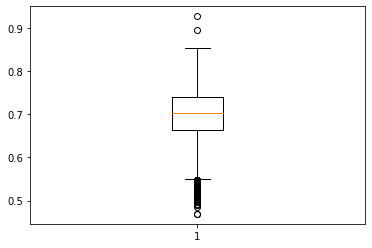

In [24]:
_ = plt.boxplot(sorted_cai_df.iloc[:,1])

## Primer 3: Konstrukcija filogenetskog stabla na osnovu RSCU
Stablo je konstruisano na osnovu RSCU vrednosti HBB gena kod 5 različitih organizama.
Za konstrukciju stabla korišćen je algoritam za hijerarhijsko klasterovanje iz biblioteke `scikit-learn`

In [25]:
from sklearn.cluster import AgglomerativeClustering # - Hijerarhijsko klasterovanje
from scipy.cluster.hierarchy import dendrogram # - Crtanje dendrograma
import numpy as np
import os

In [26]:
'''Učitavanje HBB sekvenci iz foldera hbb_sekvence'''

# Izdvajanje putanja do fajlova
base = 'hbb_sekvence'
filepaths = [f'{base}/{filename}' for filename in os.listdir(base) if filename[0] != '.']

records = []
init = True
df = None

# Učitavanje sekvenci i konstrukcija DataFrame-a sa RSCU vrednostima za pojedinačne sekvence
for path in filepaths:
    record = SeqIO.read(path, 'fasta')
    label = path.split('/')[-1].split('.')[0]
    sequence = record.seq
    rscu_table = RSCU([sequence])
    data=[[label] + list(rscu_table.values())]
    columns=['label']+list(rscu_table.keys())
    
    if init:
        df = pd.DataFrame(data=data, columns=columns)
        init = False
    else:
        df = pd.concat([df, pd.DataFrame(data=data, columns=columns)])
        
df = df.reset_index(drop=True) # - Resetovanje indeksne kolone
df

,label,TTT,TTC,TTA,TTG,TCT,TCC,TCA,TCG,TAT,...,GCA,GCG,GAT,GAC,GAA,GAG,GGT,GGC,GGA,GGG
0,hbb_chinchilla,0.444444,1.555556,0.157895,0.157895,1.600000,1.600000,0.400000,0.400000,0.400000,...,0.108108,0.216216,0.500000,1.500000,0.545455,1.454545,1.777778,1.777778,0.148148,0.296296
1,hbb_human,1.250000,0.750000,0.150000,0.150000,0.923077,1.846154,0.461538,0.461538,1.333333,...,0.125000,0.125000,1.428571,0.571429,0.500000,1.500000,1.185185,2.370370,0.148148,0.296296
2,hbb_mulatta,1.250000,0.750000,0.153846,0.153846,0.923077,1.846154,0.461538,0.461538,0.666667,...,0.142857,0.142857,1.428571,0.571429,0.500000,1.500000,1.481481,2.074074,0.148148,0.296296
3,hbb_cebus,1.000000,1.000000,0.150000,0.150000,0.923077,1.846154,0.461538,0.461538,0.666667,...,0.133333,0.133333,1.000000,1.000000,0.857143,1.142857,1.600000,1.920000,0.160000,0.320000
4,hbb_sapajus,1.000000,1.000000,0.150000,0.150000,0.923077,1.846154,0.461538,0.461538,0.666667,...,0.133333,0.133333,1.000000,1.000000,0.857143,1.142857,1.600000,1.920000,0.160000,0.320000
5,hbb_holoepus,1.250000,0.750000,0.146341,0.878049,0.375000,3.000000,0.375000,0.375000,1.000000,...,0.133333,0.133333,1.111111,0.888889,1.250000,0.750000,1.600000,1.600000,0.400000,0.400000


In [27]:
'''Razdvajanje RSCU vrednosti od labela'''
X = df.iloc[:,1:]
y = df.iloc[:,0]
organism_labels = y.values.ravel()

In [28]:
'''Klasterovanje sekvenci na osnovu RSCU vrednosti'''

ac = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
_ = ac.fit(X)

In [29]:
'''Metod za crtanje dendrograma'''
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

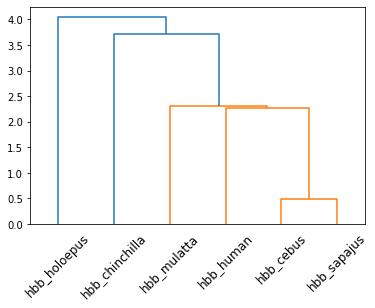

In [30]:
'''Iscrtavanje pretpostavljenog filogenetskog stabla'''

plot_dendrogram(ac, labels=organism_labels, leaf_rotation=45)